In [312]:
#import necessary libraries

import pickle
import numpy as np
from matplotlib import pyplot as plt
import random
import cv2
import feature_extractor as fe

# Load Dataset

In [313]:
#load all 5 btaches of train data and merge them

trainData=np.empty((0,3072),dtype=int)
trainLabel=np.empty((0),dtype=int)

for i in range(1,6):
    file='cifar-10-batches-py/data_batch_'+str(i)
    with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
    
    trainData=np.append(trainData,dict[b'data'],axis=0)
    trainLabel=np.append(trainLabel,dict[b'labels'],axis=0)
    
print("Train Data consists of", len(trainData), "images.")
print("With each image is of the shape", trainData[0].shape)

Train Data consists of 50000 images.
With each image is of the shape (3072,)


In [314]:
#load test data

testData=np.empty((0,3072),dtype=int)
testLabel=np.empty((0),dtype=int)

file='cifar-10-batches-py/test_batch'
with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')

testData=np.append(testData,dict[b'data'],axis=0)
testLabel=np.append(testLabel,dict[b'labels'],axis=0)

print("Test Data consists of", len(testData), "images.")
print("With each image is of the shape", testData[0].shape)

Test Data consists of 10000 images.
With each image is of the shape (3072,)


# Image Transformation methods

## Image Enhancement

In [315]:
#function to enhance image

def imageEnhancement(image):
    enhanced_img=np.empty([3,1024], dtype=int)
    reshaped_img=np.reshape(image, (3,1024))
    for i in range (3):
        min_val=np.min(reshaped_img[i])
        max_val=np.max(reshaped_img[i])
        for j in range(len(reshaped_img[i])):
            enhanced_img[i][j]=((reshaped_img[i][j]-min_val)/(max_val-min_val))*255
    
    enhanced_img=np.reshape(enhanced_img,(3,32,32))
    enhanced_img=enhanced_img.transpose(1,2,0)
    
    return enhanced_img

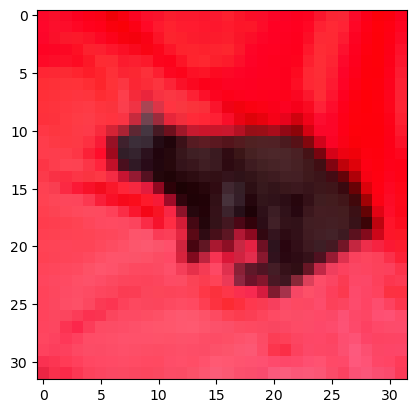

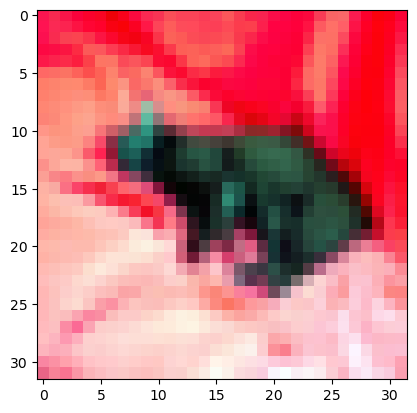

In [316]:
#example to demonstrate image enhancement

sample_image=trainData[21]
enhanced_img=imageEnhancement(sample_image)

#display original image

Img=np.reshape(sample_image,(3,32,32))
Img=Img.transpose(1,2,0)
plt.imshow(Img)
plt.show()

#display enhanced image
plt.imshow(enhanced_img)
plt.show()

## Image Posterization

In [317]:
#function to posterize image

def imagePosterization(image):
    posterized_img=np.empty([3,1024], dtype=int)
    reshaped_img=np.reshape(image, (3,1024))
    for i in range (3):
        min_val=np.min(reshaped_img[i])
        max_val=np.max(reshaped_img[i])
        range_r=max_val-min_val
        divider=255/range_r
        for j in range(len(reshaped_img[i])):
            posterized_img[i][j]=reshaped_img[i][j]/divider
            posterized_img[i][j]+=min_val
            if posterized_img[i][j]>255:
                posterized_img[i][j]=255
                
    
    posterized_img=np.reshape(posterized_img,(3,32,32))
    posterized_img=posterized_img.transpose(1,2,0)
                
    return posterized_img


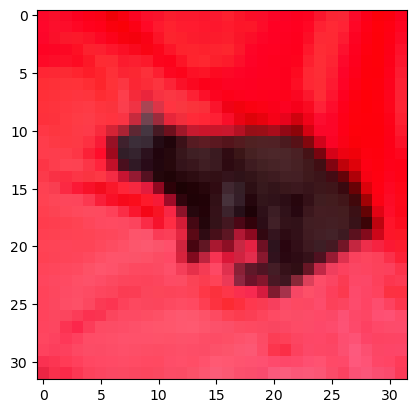

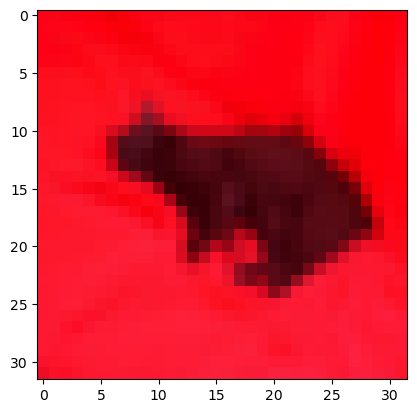

In [318]:
#example to demonstrate image posterization

sample_image=trainData[21]
posterized_img=imagePosterization(sample_image)

#display original image

Img=np.reshape(sample_image,(3,32,32))
Img=Img.transpose(1,2,0)
plt.imshow(Img)
plt.show()

#display enhanced image
plt.imshow(posterized_img)
plt.show()

## Image Rotation

In [319]:
#function to rotate image by d degree

def imageRotation(image):
    
    degree=random.randint(-180,180)
    reshaped_img=np.reshape(image,(3,32,32))
    reshaped_img=reshaped_img.transpose(1,2,0)
    
    # First we will convert the degrees into radians
    theta = np.radians(degree)
    cos, sin = np.cos(theta), np.sin(theta)

    # We consider the rotated image to be of the same size as the original
    rotated_img = np.zeros((reshaped_img.shape),dtype=int)

    # Finding the center point of rotated (or original) image.
    height = reshaped_img.shape[0]
    width  = reshaped_img.shape[1]

    midx = width//2
    midy = height//2

    for i in range(height):
        for j in range(width):             
            x= (i-midx)*cos+(j-midy)*sin
            y= -(i-midx)*sin+(j-midy)*cos

            x=round(x)+midx 
            y=round(y)+midy

            if (x>=0 and y>=0 and x<reshaped_img.shape[0] and  y<reshaped_img.shape[1]):
                rotated_img[i,j,:] = reshaped_img[x,y,:]

    return rotated_img

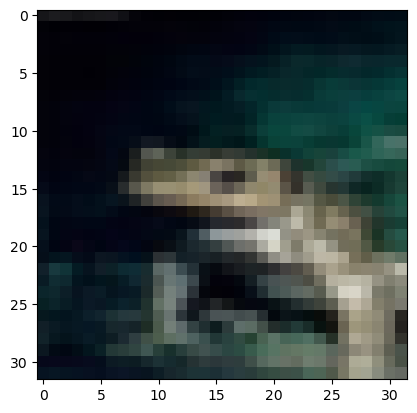

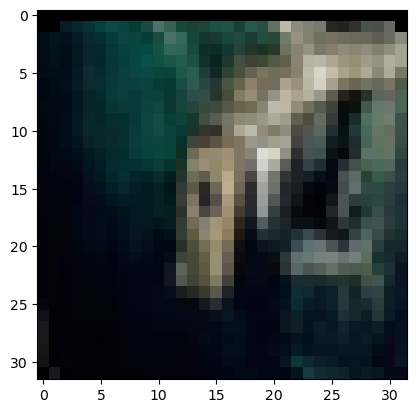

In [320]:
#example to demonstrate image rotation

sample_image=trainData[21200]
rotated_img=imageRotation(sample_image)

#display original image

Img=np.reshape(sample_image,(3,32,32))
Img=Img.transpose(1,2,0)
plt.imshow(Img)
plt.show()

#display enhanced image
plt.imshow(rotated_img)
plt.show()

## Image Contrast & Horizontal Flipping

In [321]:
#function to contrast image and then flip it horizontally

def imageContrast(image):
    alpha=random.uniform(0.5,2)
    contrasted_img=np.empty((image.shape),dtype=int)
    for i in range(len(image)):
        pixel=alpha*(image[i]-128) + 128
        if (pixel>=0 and pixel<=255):
            contrasted_img[i]=pixel
        elif pixel<0:
            contrasted_img[i]=0
        else:
            contrasted_img[i]=255
            
    contrasted_img=np.reshape(contrasted_img,(3,32,32))
    contrasted_img=contrasted_img.transpose(1,2,0)
            
    prob=random.randint(0,1)
    
    if prob==1:
        contrasted_fliped_img = contrasted_img[:,::-1,:]
    else:
        contrasted_fliped_img = contrasted_img
        
    return contrasted_fliped_img

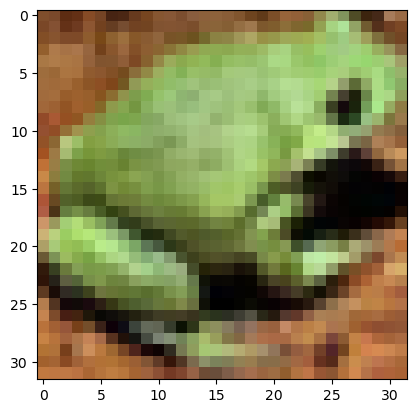

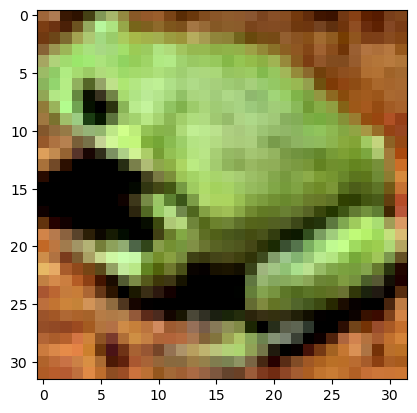

In [322]:
#example to demonstrate image contrast and flipped image

sample_image=trainData[2100]
contrasted_img=imageContrast(sample_image)

#display original image

Img=np.reshape(sample_image,(3,32,32))
Img=Img.transpose(1,2,0)
plt.imshow(Img)
plt.show()

#display contrasted image
plt.imshow(contrasted_img)
plt.show()

# Augmented Data

In [129]:
#Create Augmented Data and merge original and transformed data into single dataset

augmentedData=np.empty((len(trainData)*2*3072),dtype=int)
augmentedData=np.reshape(augmentedData,(len(trainData)*2,32,32,3))

for i in range (len(trainData)):
    
    image=trainData[i]
    
    augmentedData[i]=np.reshape(image,(3,32,32)).transpose(1,2,0)
    
    
    call_func=random.randint(1,4)
    
    if(call_func==1):
        augmentedData[i+len(trainData)]=imageEnhancement(image)
        
    elif(call_func==2):
        augmentedData[i+len(trainData)]=imagePosterization(image)
        
    elif(call_func==3):
        augmentedData[i+len(trainData)]=imageRotation(image)
        
    elif(call_func==4):
        augmentedData[i+len(trainData)]=imageContrast(image)

In [ ]:
#Pickel augmented Data

# Open a file and use dump()
with open('augmentedData.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(augmentedData, file)

# Feature Extraction

In [132]:
#Feature Extraction

#create object for BBResNet18 from feature_extractor.py
obj=fe.BBResNet18()

def getFeatures(data):

    batchSize=100
    batchNumber=len(data)//batchSize
    
    batch=np.empty((batchSize,3,224,224),dtype='float32')
    
    for i in range(batchNumber):
        batchData=data[i*100:(i+1)*100]
        index=0
        for img in batchData:
            temp=np.array(img,dtype='uint8')
            temp=cv2.resize(temp,(224,224))
            batch[index]=np.transpose(temp,(2,0,1))
            index=index+1
        batch/=255
        if i == 0:
            feature_vector_list = obj.feature_extraction(batch)
        else:
            feature_vector_list=np.append(feature_vector_list,obj.feature_extraction(batch),axis=0)
    return feature_vector_list

C:\Users\Kartik\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Kartik\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [133]:
#extract features from augmentedData (training data)
trainFeature = getFeatures(augmentedData)

In [ ]:
#Pickel training Features

# Open a file and use dump()
with open('feature_vector_train.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(trainFeature, file)

In [ ]:
#create training labels pickel file
 
#Pickel training Labels

# Open a file and use dump()
with open('labels_train.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(trainLabel, file)

In [158]:
#preparing data for testing 

test=np.empty((len(testData)*3072),dtype=int)
test=np.reshape(test,(len(testData),32,32,3))

for i in range(len(testData)):
    image = testData[i]
    test[i]=np.reshape(image,(3,32,32)).transpose(1,2,0)

In [165]:
testData=test
# testData.shape

#extract features from augmentedData (training data)
testFeature = getFeatures(testData)

(10000, 32, 32, 3)

In [ ]:
#Pickel testing Features

# Open a file and use dump()
with open('feature_vector_test.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(testFeature, file)

In [ ]:
#create training labels pickel file
 
#Pickel training Labels

# Open a file and use dump()
with open('labels_test.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(testLabel, file)